<a href="https://colab.research.google.com/github/PedroC-dev/RelatorioAtividadesPDI/blob/main/filtragem_frequencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

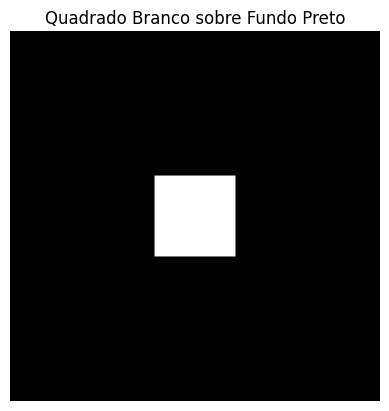

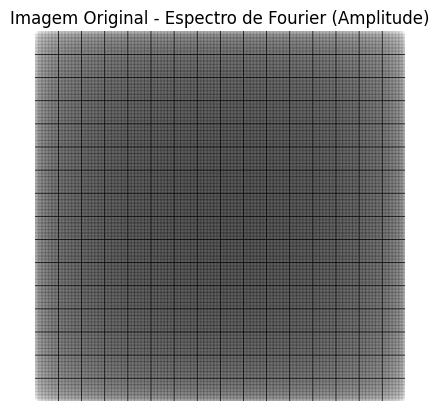

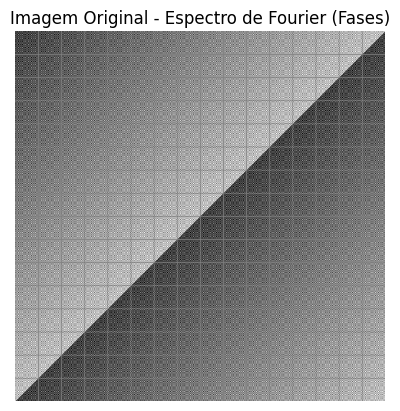

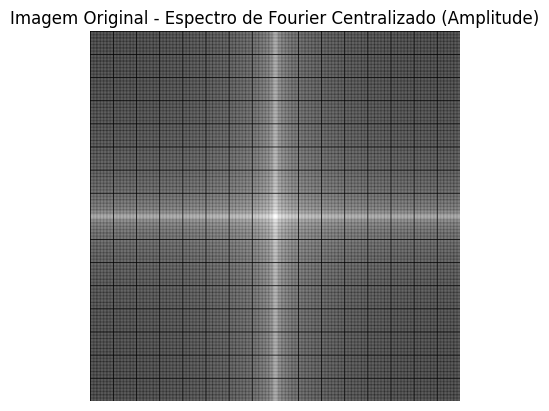

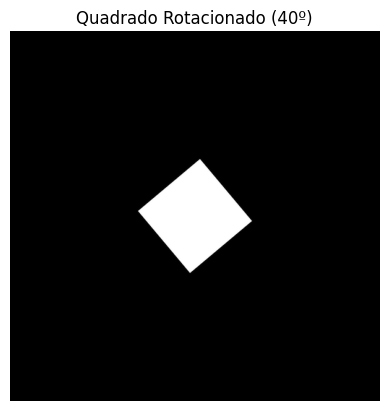

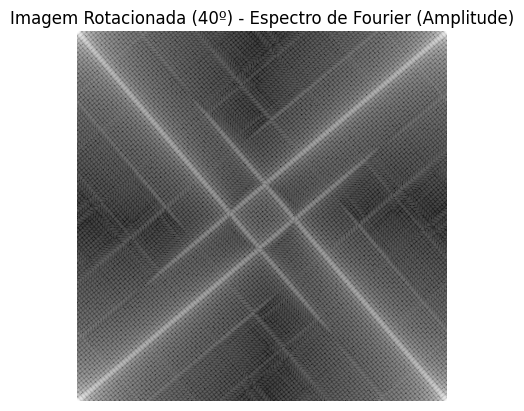

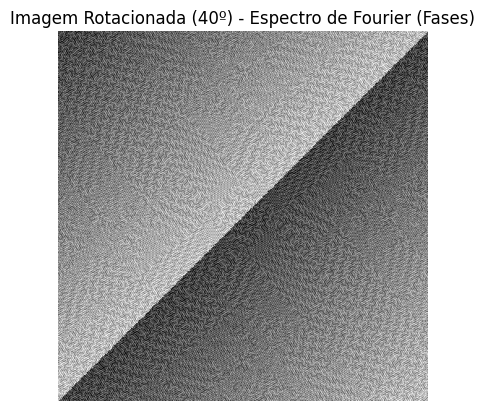

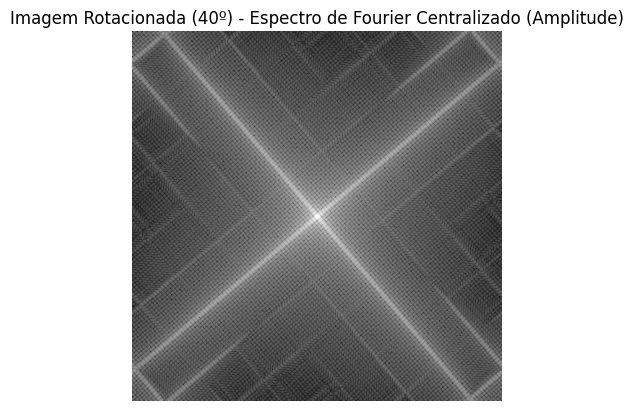

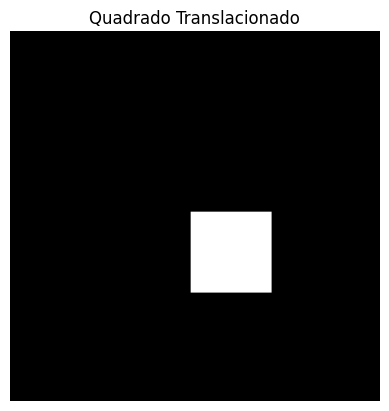

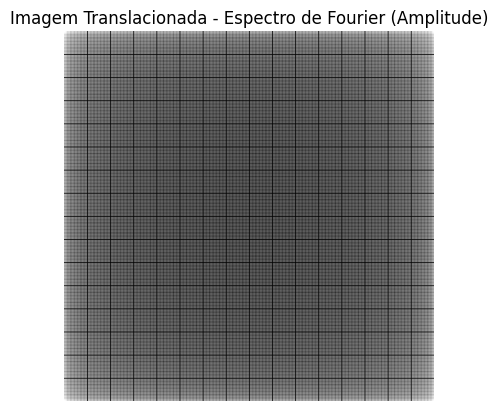

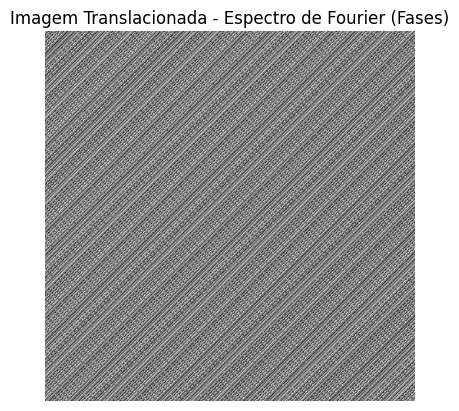

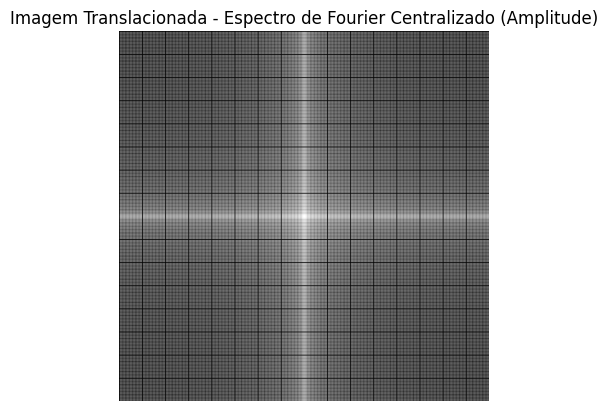

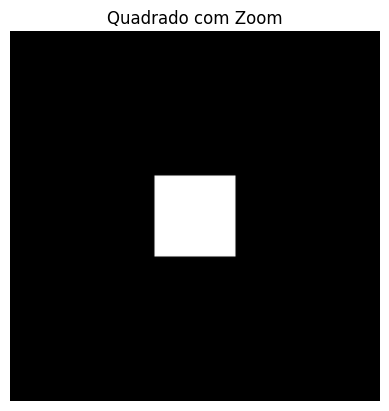

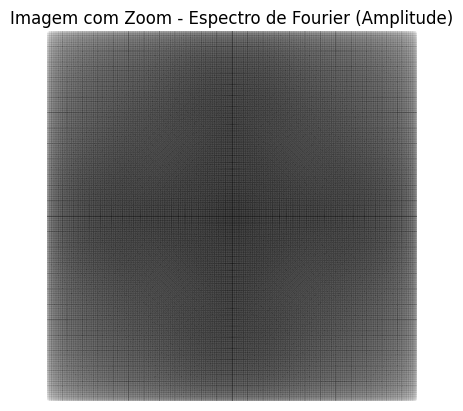

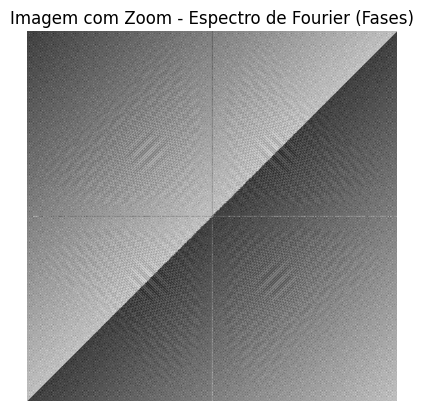

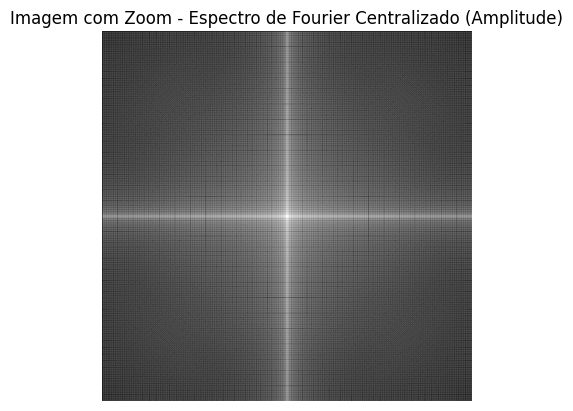

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate, shift, zoom

def criar_imagem():
    img = np.zeros((512, 512), dtype=np.uint8)
    img[200:312, 200:312] = 255
    return img

def visualizar_imagem(img, titulo):
    plt.imshow(img, cmap='gray')
    plt.title(titulo)
    plt.axis('off')
    plt.show()

def calcular_espectros(img):
    f_transform = np.fft.fft2(img)
    amplitude_spectrum = np.abs(f_transform)
    phase_spectrum = np.angle(f_transform)
    f_transform_shifted = np.fft.fftshift(f_transform)
    amplitude_spectrum_shifted = np.abs(f_transform_shifted)
    return f_transform, amplitude_spectrum, phase_spectrum, amplitude_spectrum_shifted

def visualizar_espectros(amplitude_spectrum, phase_spectrum, amplitude_spectrum_shifted, titulo_prefixo):
    plt.imshow(np.log(1 + amplitude_spectrum), cmap='gray')
    plt.title(f'{titulo_prefixo} - Espectro de Fourier (Amplitude)')
    plt.axis('off')
    plt.show()

    plt.imshow(phase_spectrum, cmap='gray')
    plt.title(f'{titulo_prefixo} - Espectro de Fourier (Fases)')
    plt.axis('off')
    plt.show()

    plt.imshow(np.log(1 + amplitude_spectrum_shifted), cmap='gray')
    plt.title(f'{titulo_prefixo} - Espectro de Fourier Centralizado (Amplitude)')
    plt.axis('off')
    plt.show()

def rotacionar_imagem(img, angulo):
    return rotate(img, angle=angulo, reshape=False)

def transladar_imagem(img, deslocamento):
    return shift(img, shift=deslocamento)

def aplicar_zoom(img, fator_zoom):
    return zoom(img, zoom=fator_zoom)

def main():
    img = criar_imagem()
    visualizar_imagem(img, 'Quadrado Branco sobre Fundo Preto')

    f_transform, amplitude_spectrum, phase_spectrum, amplitude_spectrum_shifted = calcular_espectros(img)
    visualizar_espectros(amplitude_spectrum, phase_spectrum, amplitude_spectrum_shifted, "Imagem Original")

    img_rotated = rotacionar_imagem(img, 40)
    visualizar_imagem(img_rotated, 'Quadrado Rotacionado (40º)')
    f_transform_rot, amplitude_spectrum_rot, phase_spectrum_rot, amplitude_spectrum_shifted_rot = calcular_espectros(img_rotated)
    visualizar_espectros(amplitude_spectrum_rot, phase_spectrum_rot, amplitude_spectrum_shifted_rot, "Imagem Rotacionada (40º)")

    img_translated = transladar_imagem(img, [50, 50])
    visualizar_imagem(img_translated, 'Quadrado Translacionado')
    f_transform_trans, amplitude_spectrum_trans, phase_spectrum_trans, amplitude_spectrum_shifted_trans = calcular_espectros(img_translated)
    visualizar_espectros(amplitude_spectrum_trans, phase_spectrum_trans, amplitude_spectrum_shifted_trans, "Imagem Translacionada")

    img_zoomed = aplicar_zoom(img, 1.5)
    visualizar_imagem(img_zoomed, 'Quadrado com Zoom')
    f_transform_zoom, amplitude_spectrum_zoom, phase_spectrum_zoom, amplitude_spectrum_shifted_zoom = calcular_espectros(img_zoomed)
    visualizar_espectros(amplitude_spectrum_zoom, phase_spectrum_zoom, amplitude_spectrum_shifted_zoom, "Imagem com Zoom")

if __name__ == "__main__":
    main()


Rotação: A rotação da imagem resulta em uma rotação correspondente no espectro de Fourier, preservando a simetria das frequências.
Translação: A translação espacial não altera a magnitude do espectro, mas altera as fases. Isso se reflete no deslocamento da fase, enquanto a amplitude do espectro permanece inalterada.
Zoom: O aumento da imagem resulta em uma compressão das frequências no domínio de Fourier, movendo as altas frequências para mais perto do centro, o que muda a escala do espectro